*Импорт необходимых библиотек.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, shapiro

*Необходимые для работы функции.*

In [2]:
def gaps2NaN(series):
    """ Функция заменяет пустые строки на NaN значения """
    if series.dtype == 'O':
        series = series.apply(lambda x: None if pd.isnull(
            x) else None if x == 'nan' else None if x.strip() == '' else x)
    else:
        series = series.apply(lambda x: None if x == '' else x)


def get_struct_params(series, verbose=True):
    """ Функция возвращает медиану, Q1, Q3, IQR """
    median = series.median()
    perc25 = series.quantile(0.25)
    perc75 = series.quantile(0.75)
    IQR = perc75 - perc25

    if verbose:
        print('25-й перцентиль: {},'.format(perc25), 
              '75-й перцентиль: {},'.format(perc75), 
              "IQR: {}, ".format(IQR),
              "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    temp_dict = {'median': median, 'perc25': perc25,
                 'perc75': perc75, 'iqr': IQR}

    return temp_dict


def get_boxplot(df, x, y):
    """ Строит boxplot по заданным параметрам """
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=x, y=y,
                data=df,
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_kdeplot(column):
    """ Строит KDE график по заданной колонке для score """
    for index in stud_math_df[column].unique():
        sns.kdeplot(stud_math_df[stud_math_df[column]
                                 == index].score, label=index)
    plt.xlabel('score', size=10)
    plt.title(column, size=15)
    plt.show()

*Чтение датафрейма из файла.*

In [3]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math_df = pd.read_csv('stud_math.csv.xls')

*Первичный осмотр данных.*

In [4]:
display(stud_math_df.head(10))
stud_math_df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Из первичного осмотра данных можно сделать следующие выводы:
* Для удобства анализа необходимо переименовать колонку studytime, granular в studytime_granular и привести все имена колонок к нижнему регистру;
* В датафрейме 13 числовых столбцов и 17 строковых стобцов;
* Присутствуют столбцы с null значениями.

*Переименование столбцов.*

In [5]:
stud_math_df.rename(
    columns={'studytime, granular': 'studytime_granular'}, inplace=True)

for i in stud_math_df.columns:
    stud_math_df.rename(columns={i: i.lower()}, inplace=True)

stud_math_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

*Замена пропусков на NaN для всех столбцов.*

In [6]:
for column in stud_math_df.columns:
    gaps2NaN(stud_math_df[column])

*Анализ всех столбцов на уникальные и NaN значения.*

In [7]:
for column in stud_math_df.columns:
    print("Количество уникальных значений в столбце %s:" %
          (stud_math_df[column].name), len(stud_math_df[column].unique()))
    print("Количество NaN значений в столбце %s:" %
          (stud_math_df[column].name), stud_math_df[column].isnull().sum())
    print('\n')

Количество уникальных значений в столбце school: 2
Количество NaN значений в столбце school: 0


Количество уникальных значений в столбце sex: 2
Количество NaN значений в столбце sex: 0


Количество уникальных значений в столбце age: 8
Количество NaN значений в столбце age: 0


Количество уникальных значений в столбце address: 3
Количество NaN значений в столбце address: 17


Количество уникальных значений в столбце famsize: 3
Количество NaN значений в столбце famsize: 27


Количество уникальных значений в столбце pstatus: 3
Количество NaN значений в столбце pstatus: 45


Количество уникальных значений в столбце medu: 6
Количество NaN значений в столбце medu: 3


Количество уникальных значений в столбце fedu: 7
Количество NaN значений в столбце fedu: 24


Количество уникальных значений в столбце mjob: 6
Количество NaN значений в столбце mjob: 19


Количество уникальных значений в столбце fjob: 6
Количество NaN значений в столбце fjob: 36


Количество уникальных значений в столбце reaso

*Распределение столбца age.*

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

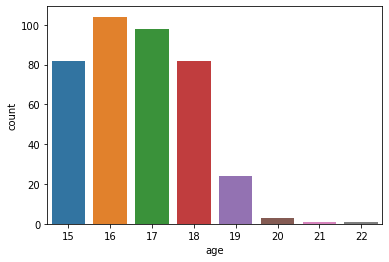

In [8]:
sns.countplot(x='age', data=stud_math_df)
stud_math_df.age.describe()

*Из распределения видно, что в школе обучаются ученики от 15 до 22 лет, выбросов нет. Средний возраст ученика: 16.7 лет.*

*Распределение столбца medu.*

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

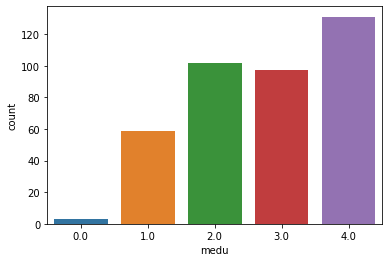

In [9]:
sns.countplot(x='medu', data=stud_math_df)
stud_math_df.medu.describe()

*Из распределения видно, что столбец с высшим образованием преобладает над остальными столбцами, в среднем же образование матери находится где-то между 5-9 классами и средним специальным, ближе к среднему специальному. Выбросов нет.*

*Распределение столбца fedu.*

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

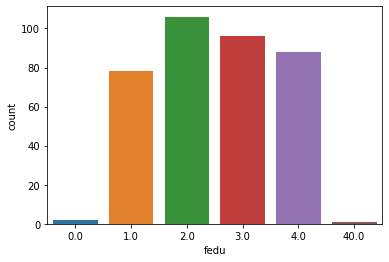

In [10]:
sns.countplot(x='fedu', data=stud_math_df)
stud_math_df.fedu.describe()

*Из распределения видно, что столбец с образованием 5-9 классов преобладает над остальными столбцами, в среднем же образование отца находится где-то между 5-9 классами и средним специальным, ближе к среднему специальному.*

**Выброс заметен невооруженным глазом, в данном случае формула межквартильного размаха будет излишней.**

*Оценка количества выбросов у столбца fedu.*

In [11]:
stud_math_df[stud_math_df.fedu > 4]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


*Видно, что у столбца fedu есть всего лишь один выброс. Подставим вместо выброса значение NaN, чтобы данное измерение не повлияло на корреляционный анализ.*

In [12]:
stud_math_df.loc[stud_math_df.fedu > 4, 'fedu'] = None

*Распределение столбца fedu без выбросов.*

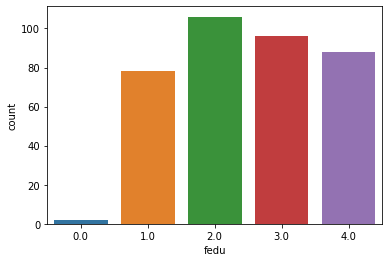

In [13]:
sns.countplot(x='fedu', data=stud_math_df)

*Распределение стобца traveltime.*

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

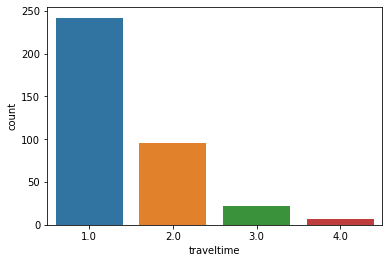

In [14]:
sns.countplot(x='traveltime', data=stud_math_df)
stud_math_df.traveltime.describe()

*Заметно, что большинство учеников тратит меньше 15 минут, чтобы добраться до школы. Выбросов не наблюдается.*

*Распределение столбца studytime.*

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

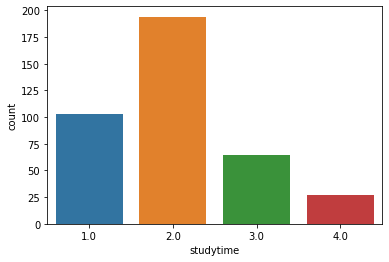

In [15]:
sns.countplot(x='studytime', data=stud_math_df)
stud_math_df.studytime.describe()

*Видно, что в основном ученики тратят 2-5 часов в неделю на учебу вне школы. Выбросов нет.*

*Рассмотрим столбец failures.*

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

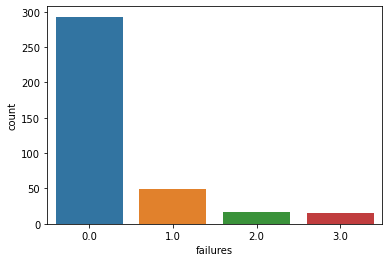

In [16]:
sns.countplot(x='failures', data=stud_math_df)
stud_math_df.failures.describe()

*Из данного распределения видно, что ученики допускают немного ошибок, решая внеучебные задачи. Выбросов нет.*

*Рассмотрим столбец studytime_granular.*

,studytime,studytime_granular
studytime,1.0,-1.0
studytime_granular,-1.0,1.0


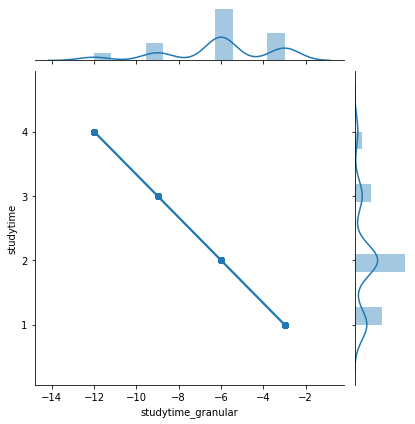

In [17]:
sns.jointplot(x='studytime_granular', y='studytime',
              kind='reg', data=stud_math_df)
stud_math_df[['studytime', 'studytime_granular']].corr()

*Коэффициент корреляции между studytime_granular и studytime равен -1. Столбец studytime_granular не пригодится для дальнейшего анализа, можно его удалить.*

In [18]:
stud_math_df.drop(['studytime_granular'], inplace=True, axis=1)

*Распределение столбца famrel.*

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

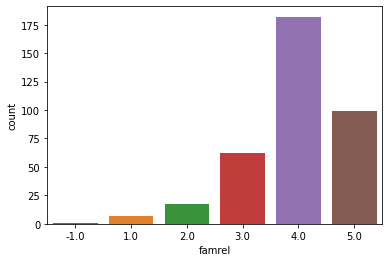

In [19]:
sns.countplot(x='famrel', data=stud_math_df)
stud_math_df.famrel.describe()

*Из распределения видно, что в среднем у учеников хорошие отношения в семье.*

**В данном распределении, как и в fedu, выброс заметен невооруженным взглядом и формулу межквартильного размаха использовать не нужно.**

*Оценка количества выбросов у столбца famrel.*

In [20]:
stud_math_df[stud_math_df.famrel < 1]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


*Ситуация такая же, как с признаком fedu. Ошибочное измерение. Запишем на место выброса значение None.*

In [21]:
stud_math_df.loc[stud_math_df.famrel < 1, 'famrel'] = None

*Распределение famrel без выбросов.*

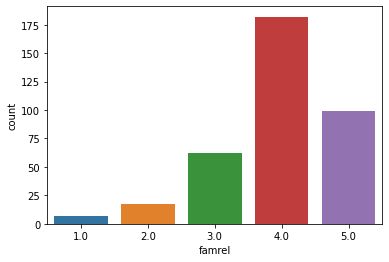

In [22]:
sns.countplot(x='famrel', data=stud_math_df)

*Распределение freetime.*

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

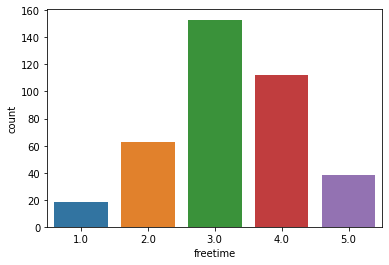

In [23]:
sns.countplot(x='freetime', data=stud_math_df)
stud_math_df.freetime.describe()

*Из распределения видно, что большинству учеников хватает свободного времени. Форма распределения близкая к симметричной, выбросов нет.*

*Распределение goout.*

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

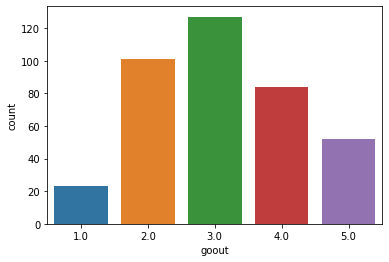

In [24]:
sns.countplot(x='goout', data=stud_math_df)
stud_math_df.goout.describe()

*Форма распределения близкая к симметричной, выбросов нет.*

*Распределение health.*

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

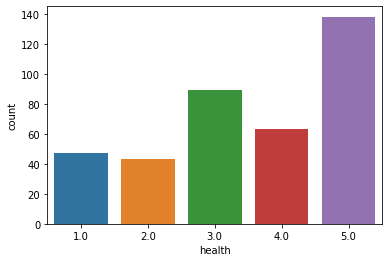

In [25]:
sns.countplot(x='health', data=stud_math_df)
stud_math_df.health.describe()

*У среднего ученика здоровье хорошее. Выбросов нет.*

*Распределение absences.*

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

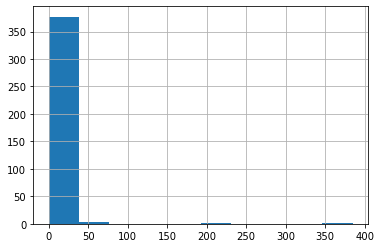

In [26]:
display(stud_math_df.absences.describe())
stud_math_df.absences.hist()

*Предположительно мы имеем дело с выбросами, применим формулу межквартильного размаха.*

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


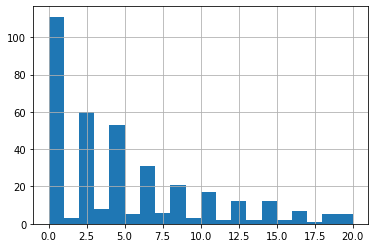

In [27]:
params = get_struct_params(stud_math_df.absences)

stud_math_df[stud_math_df.absences.between(
    params['perc25'] - 1.5*params['iqr'], params['perc75'] + 1.5*params['iqr'])]['absences'].hist(bins=20)

*После применения формулы межквартильного размаха гистограмма выглядит правдиво.*

*Запишем вместо выбросов NaN.*

In [28]:
stud_math_df.loc[((stud_math_df.absences < (params['perc25'] - 1.5*params['iqr'])) |
                  (stud_math_df.absences > (params['perc75'] + 1.5*params['iqr']))), 'absences'] = None

*Распределение score.*

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

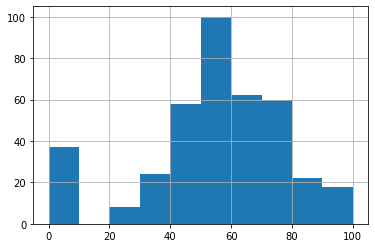

In [29]:
display(stud_math_df.score.describe())
stud_math_df.score.hist()

*Проверка на выбросы.*

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


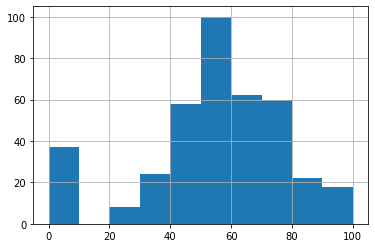

In [30]:
params = get_struct_params(stud_math_df.score)

stud_math_df[stud_math_df.score.between(
    params['perc25'] - 1.5*params['iqr'], params['perc75'] + 1.5*params['iqr'])]['score'].hist()

*Из гистрограммы видно, что средний балл примерно равен 50. Выбросы не подтвердились.*

*Рассмотрим корреляция для числовых столбцов.*

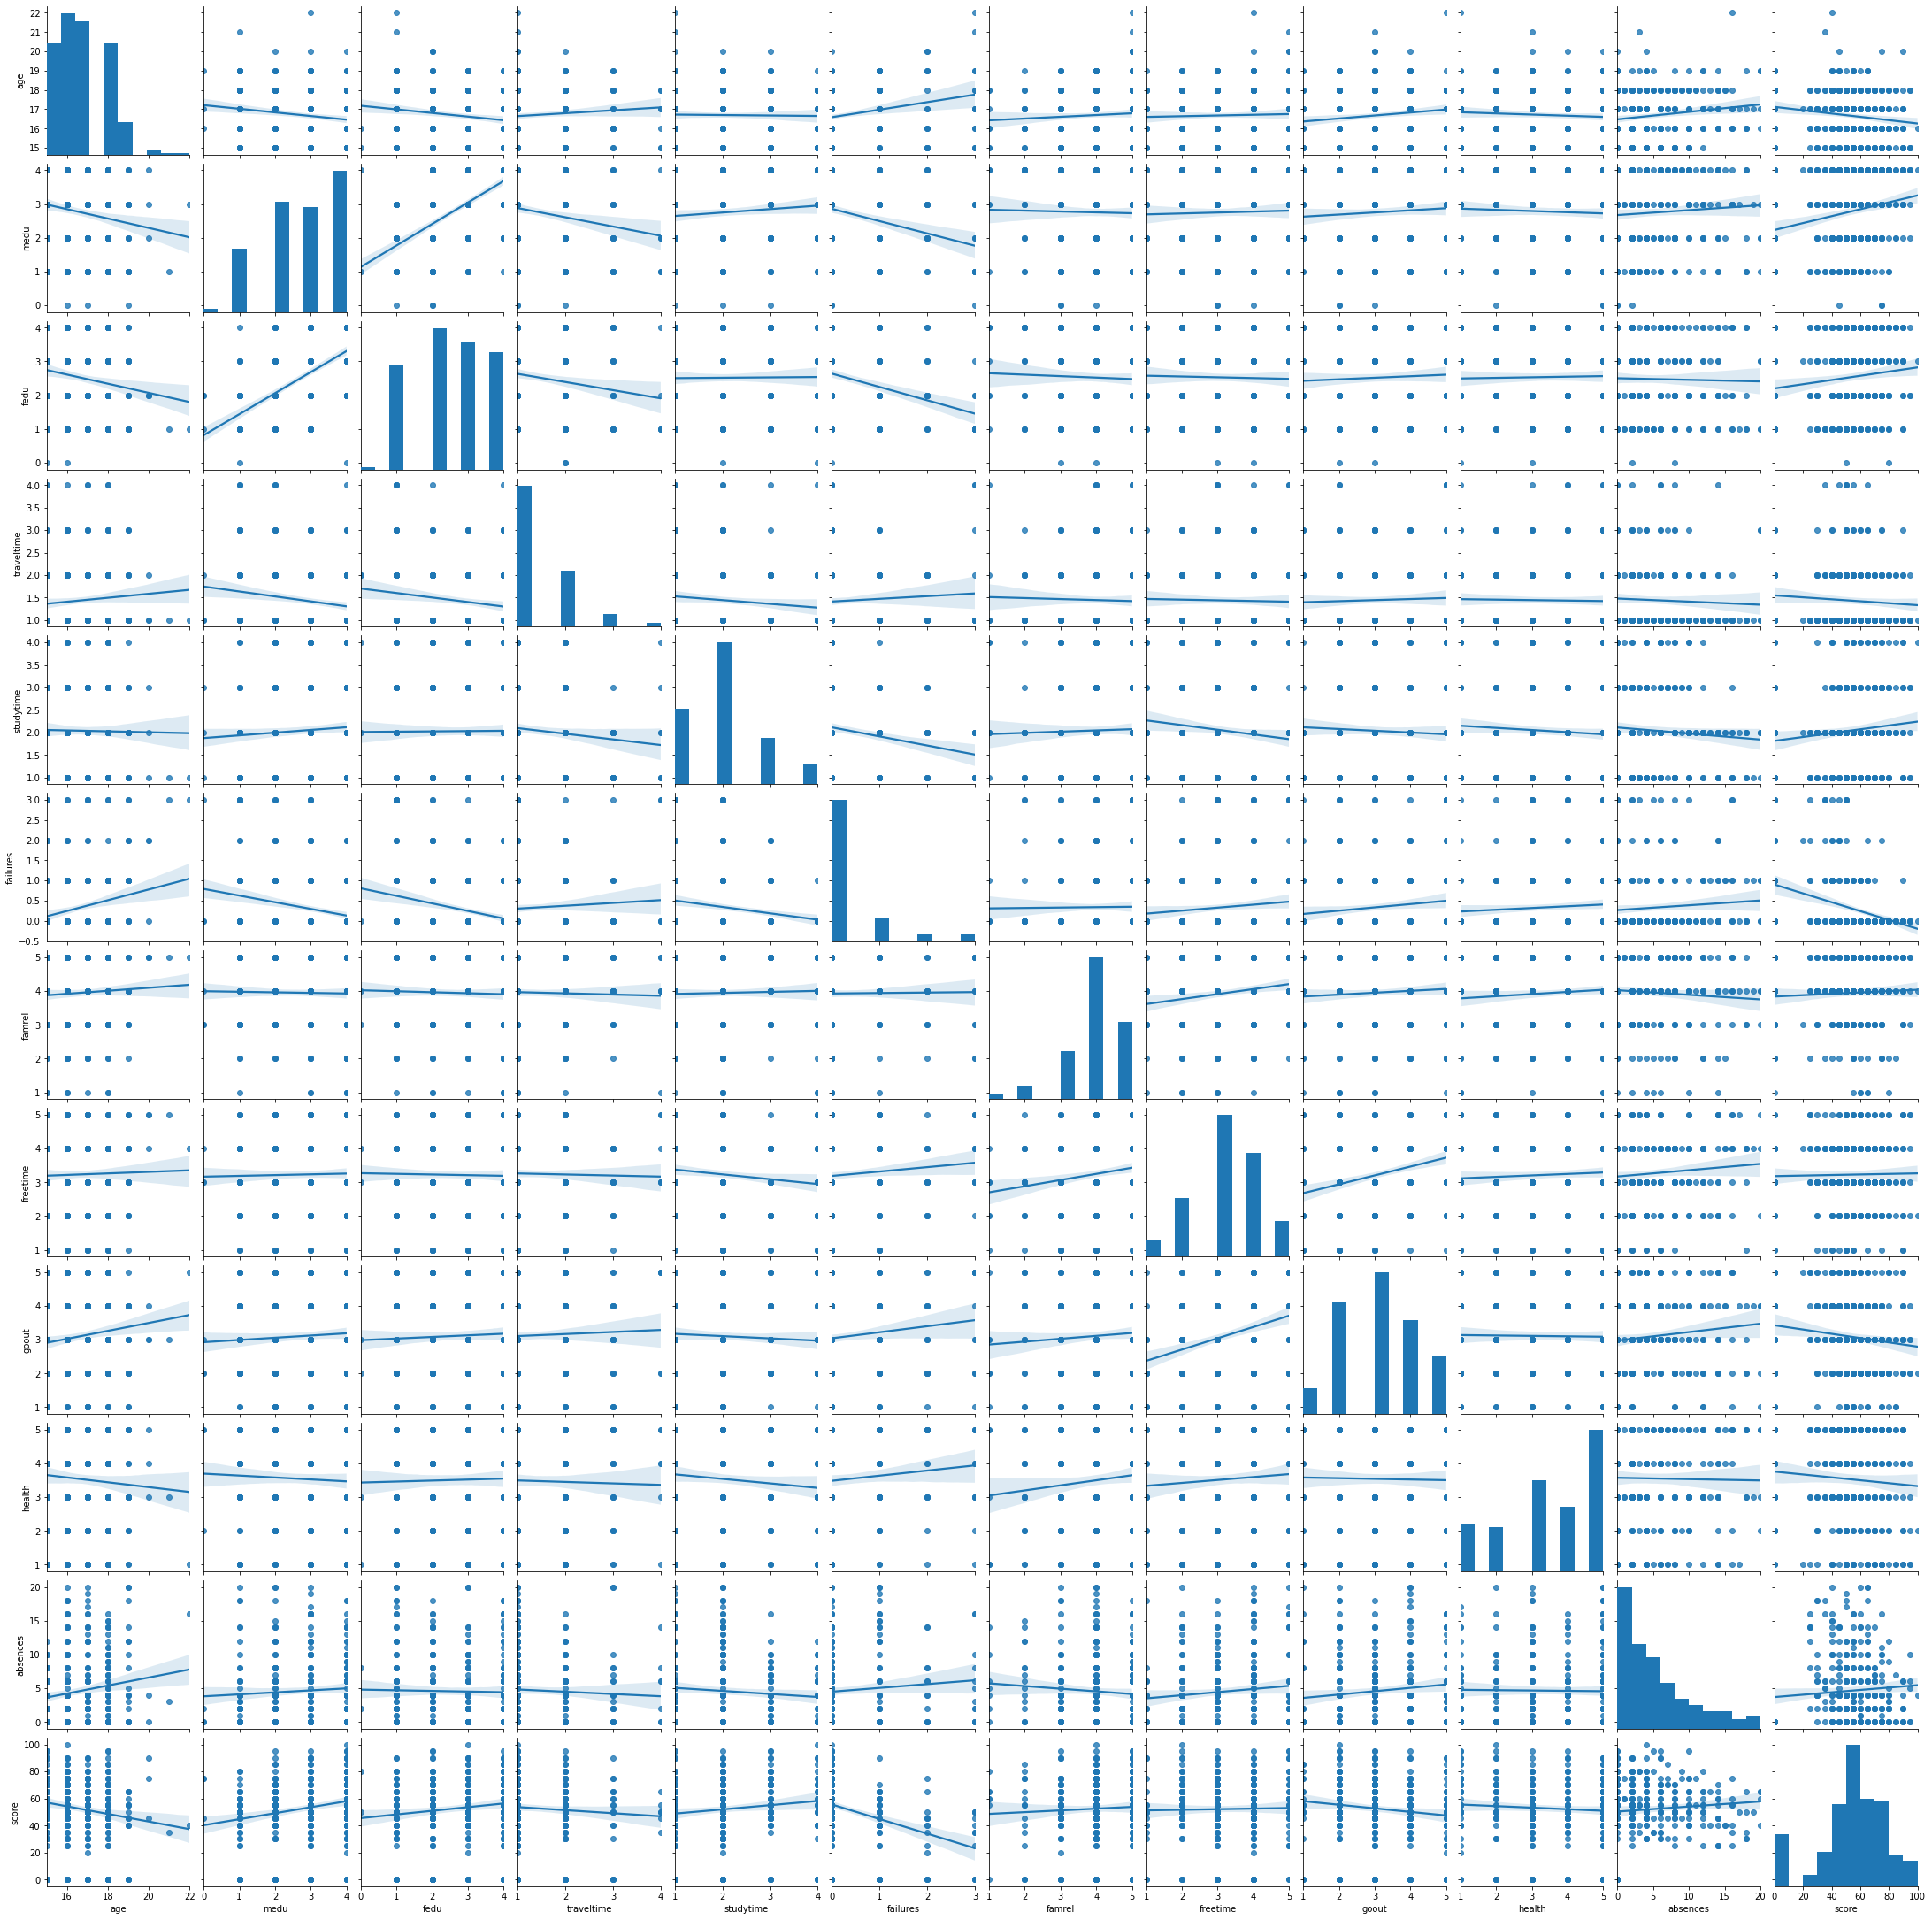

In [31]:
sns.pairplot(stud_math_df, kind='reg')

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.159546,0.081508,-0.015556,0.228047,0.063539,0.029023,0.135107,-0.065946,0.151493,-0.155726
medu,-0.161704,1.000000,0.629956,-0.173515,0.078589,-0.245463,-0.020896,0.025335,0.064164,-0.045051,0.065712,0.213349
fedu,-0.159546,0.629956,1.000000,-0.155459,0.008603,-0.271936,-0.035788,-0.021415,0.046581,0.022588,-0.021415,0.130002
traveltime,0.081508,-0.173515,-0.155459,1.000000,-0.102206,0.064699,-0.028220,-0.021937,0.037636,-0.021531,-0.047995,-0.070559
studytime,-0.015556,0.078589,0.008603,-0.102206,1.000000,-0.178992,0.028918,-0.121969,-0.051280,-0.080016,-0.078099,0.115741
failures,0.228047,-0.245463,-0.271936,0.064699,-0.178992,1.000000,0.011942,0.098382,0.120914,0.081284,0.081801,-0.344338
famrel,0.063539,-0.020896,-0.035788,-0.028220,0.028918,0.011942,1.000000,0.164324,0.069241,0.097910,-0.073509,0.051219
freetime,0.029023,0.025335,-0.021415,-0.021937,-0.121969,0.098382,0.164324,1.000000,0.296437,0.061575,0.093436,0.019026
goout,0.135107,0.064164,0.046581,0.037636,-0.051280,0.120914,0.069241,0.296437,1.000000,-0.015608,0.111587,-0.129685
health,-0.065946,-0.045051,0.022588,-0.021531,-0.080016,0.081284,0.097910,0.061575,-0.015608,1.000000,-0.014358,-0.070460


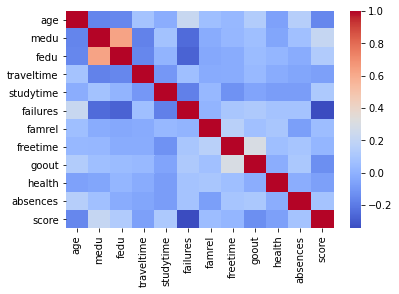

In [32]:
correlation = stud_math_df.corr()
display(correlation)
sns.heatmap(correlation, annot=False, cmap='coolwarm')

*Из корреляционного анализа числовых данных видно, что прослеживается средняя положительная корреляция между fedu и medu и слабая отрицательая корреляция между score и failures.*

*Различия score в зависимости от значений номинативных переменных.*

['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


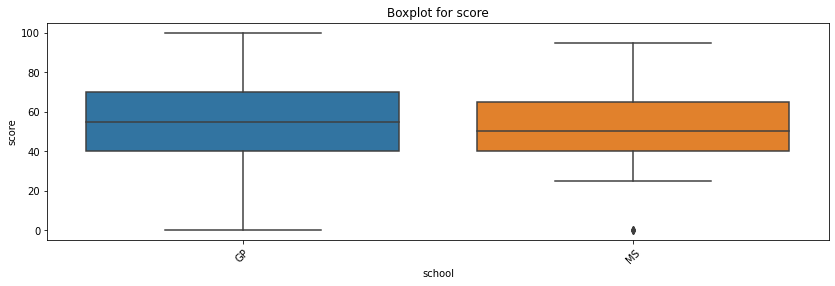

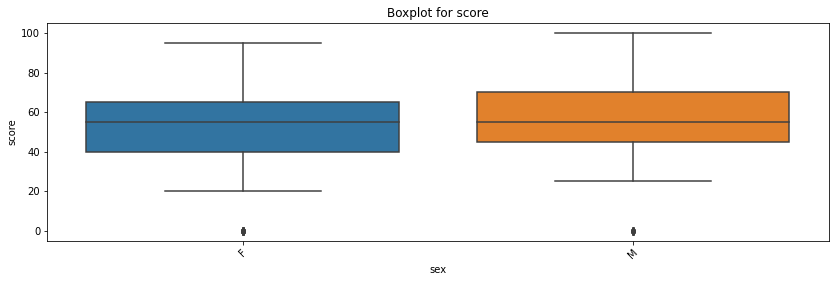

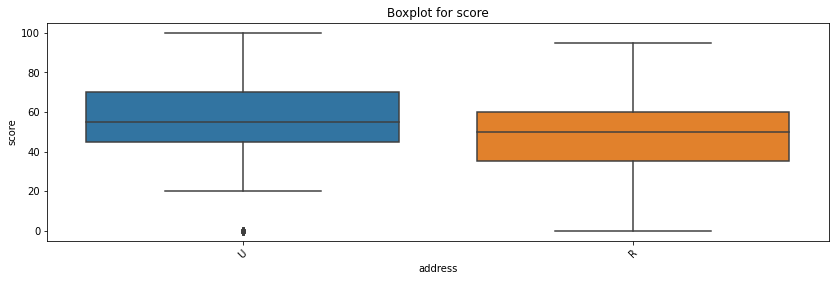

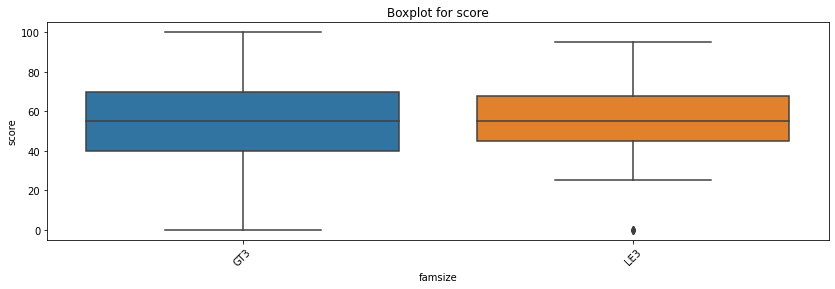

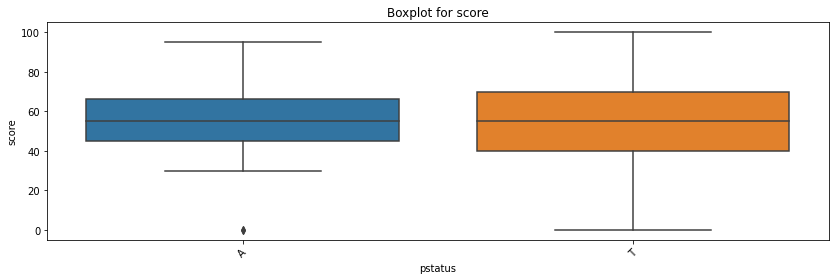

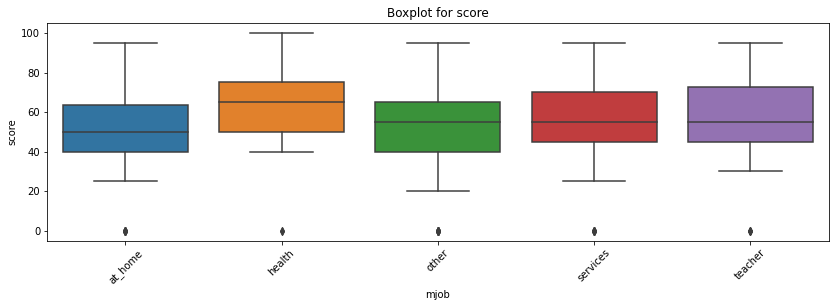

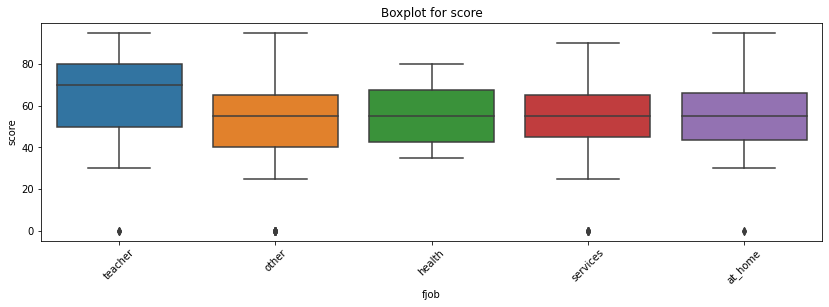

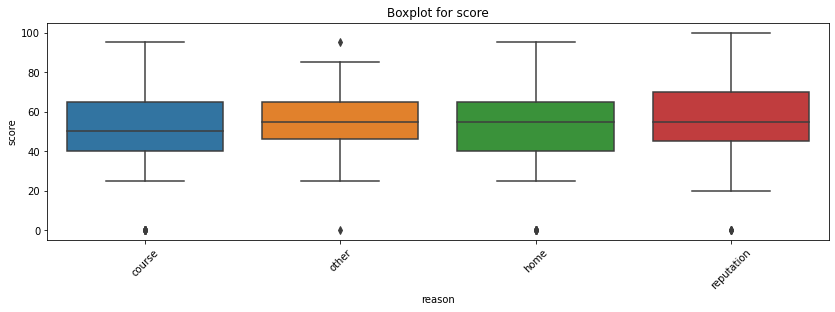

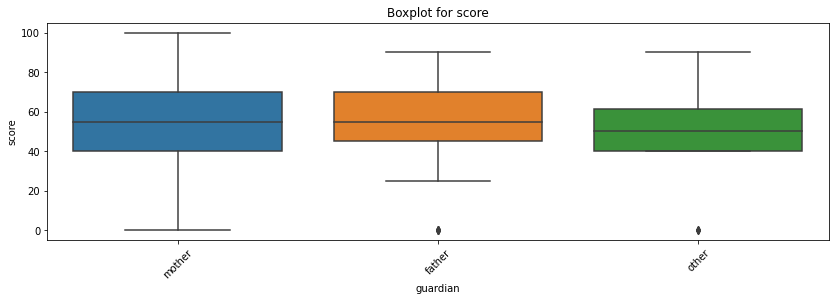

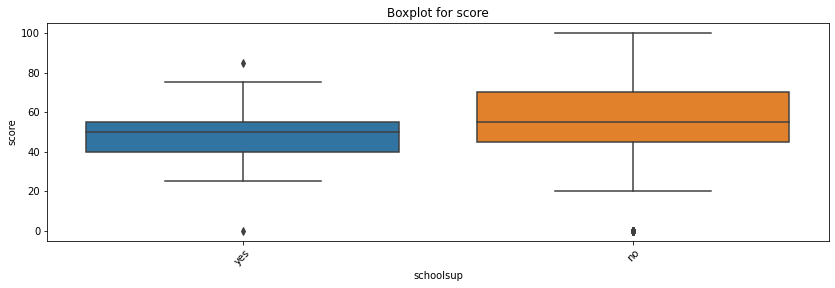

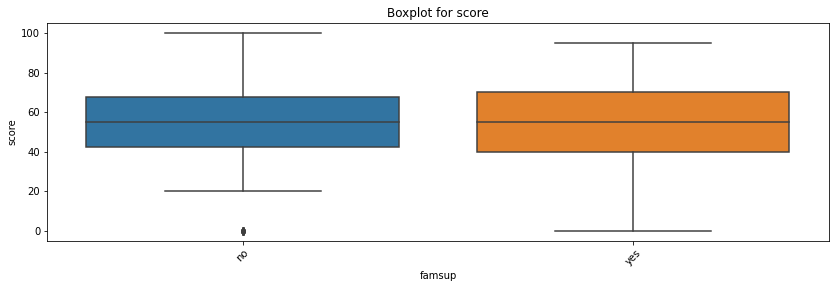

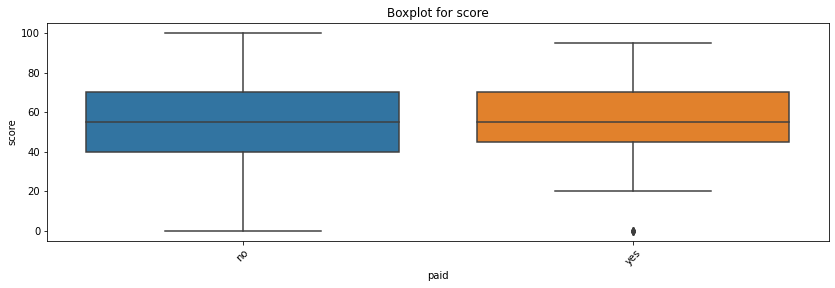

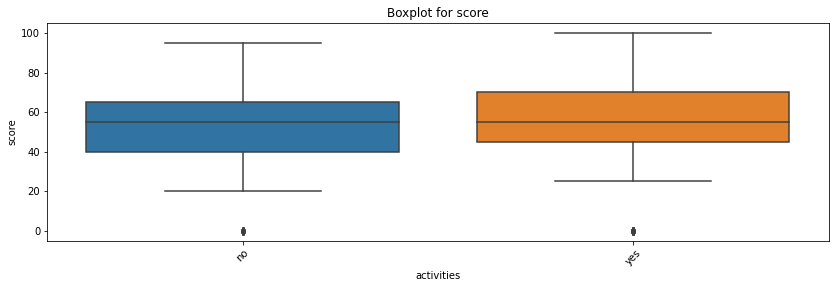

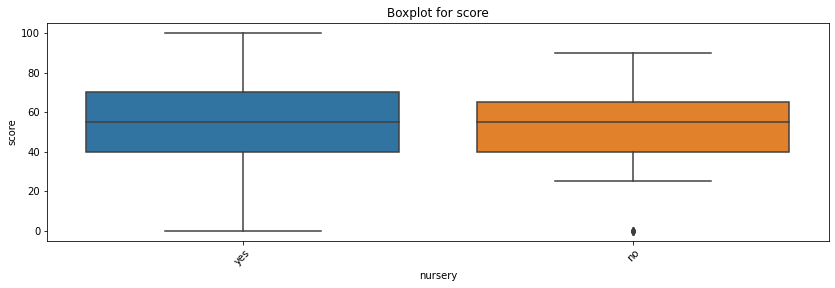

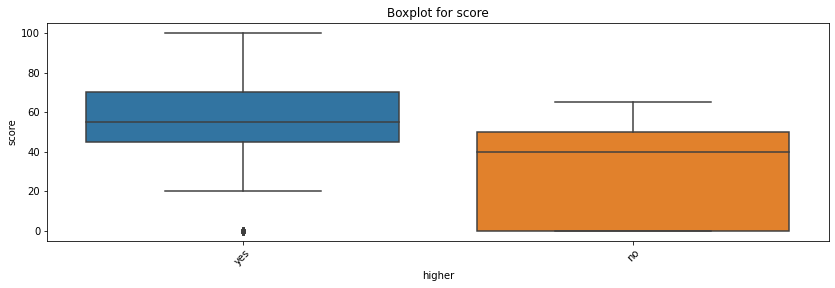

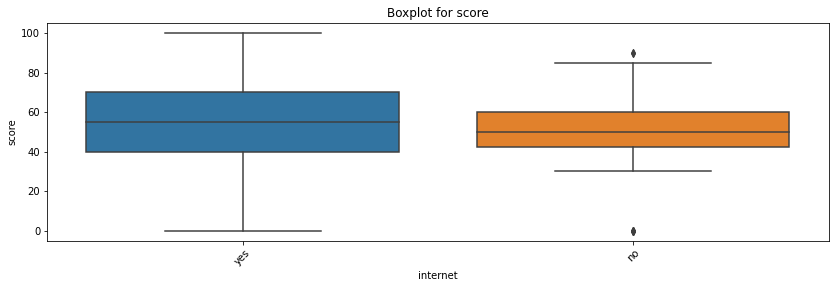

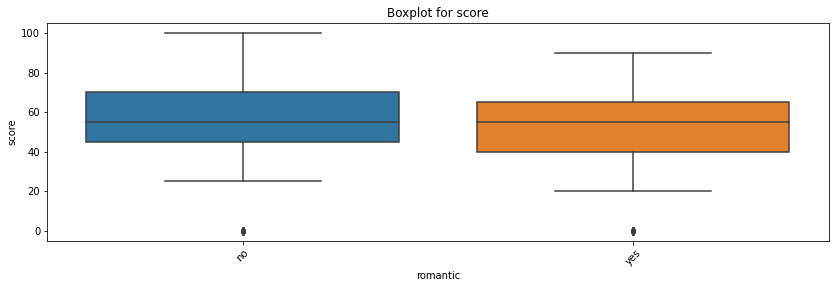

In [33]:
nominative_col = []

for column in stud_math_df.columns:
    if stud_math_df[column].dtype == 'O':
        nominative_col.append(column)

print(nominative_col)

for col in nominative_col:
    get_boxplot(stud_math_df, x=col, y='score')

*По графикам можно сказать, что параметры school, sex, famsize, pstatus, famsup, paid, activities, nursery и romantic не оказывают достаточного влияния на успеваемость учеников.*

*Проведем более подробное исследование с использованием KDE графиков.*

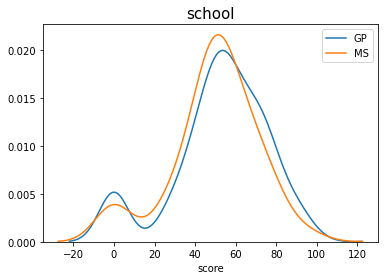

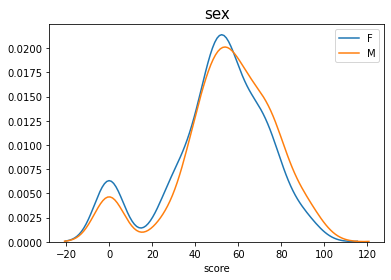

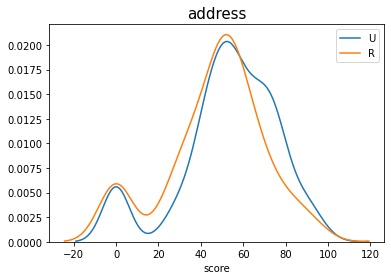

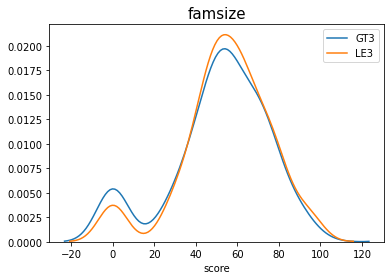

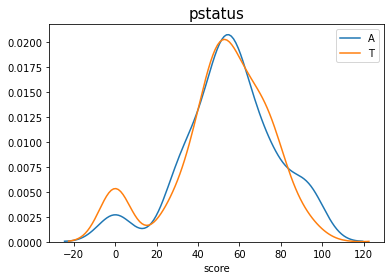

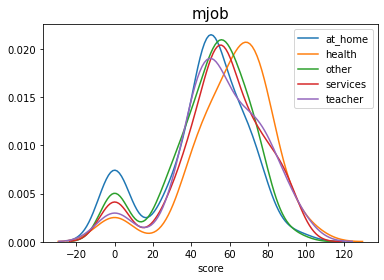

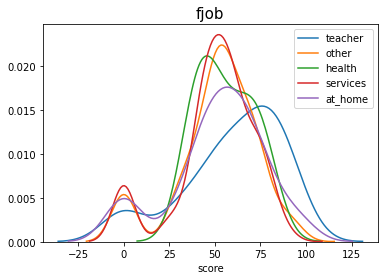

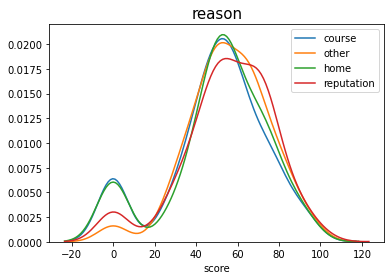

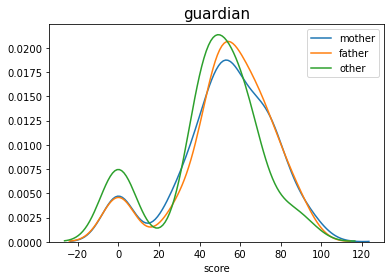

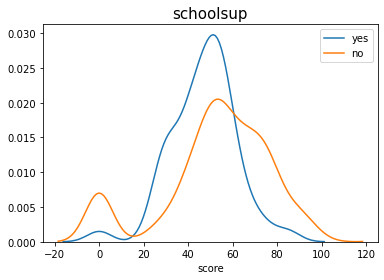

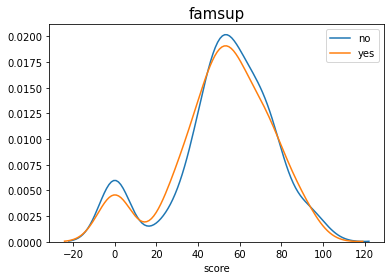

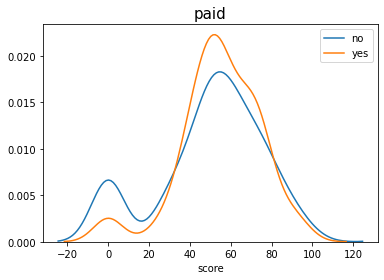

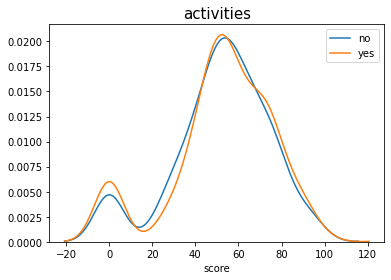

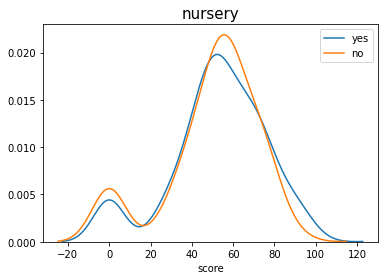

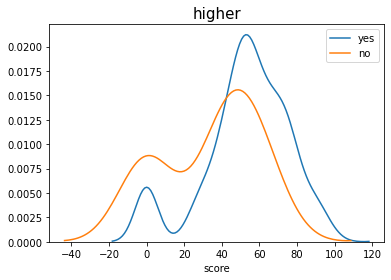

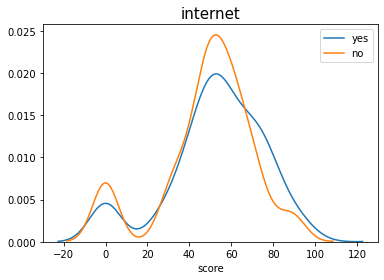

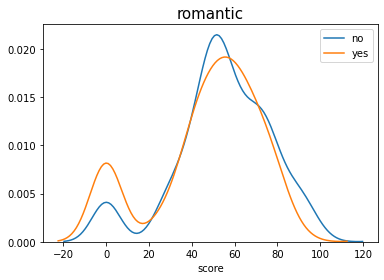

In [34]:
for i in ['school', 'sex', 'address', 'famsize', 'pstatus',
          'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
          'famsup', 'paid', 'activities', 'nursery', 'higher', 
          'internet', 'romantic']:
    get_kdeplot(i)

Отсюда видно, что на параметр score оказывают влияние следующие параметры категориальные параметры: 
* mjob
* fjob
* reason
* paid
* schoolsup
* higher.

In [35]:
stud_math_df_for_model = stud_math_df[['failures', 'mjob', 'fjob',
                                       'reason', 'paid', 'schoolsup', 'higher']]

In [36]:
stud_math_df_for_model.head(10)

,failures,mjob,fjob,reason,paid,schoolsup,higher
0,0.0,at_home,teacher,course,no,yes,yes
1,0.0,at_home,other,course,no,no,yes
2,3.0,at_home,other,other,NaN,yes,yes
3,0.0,health,NaN,home,yes,no,yes
4,0.0,other,other,home,yes,no,yes
5,0.0,services,other,reputation,yes,no,yes
6,0.0,other,other,home,no,no,yes
7,0.0,other,teacher,home,no,yes,yes
8,0.0,services,other,home,yes,no,yes
9,0.0,other,other,home,yes,no,yes
